In [7]:
import pandas as pd
import csv
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

from sklearn.preprocessing import StandardScaler
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load the dataset from a specific location as a DataFrame
dataset = pd.read_csv(r'C:\Users\abact\BC-Project\data\clean_data.csv')
dataset

,Federal_Reserve_Mins,Preprocessed Text,Date,Difference,Increase,Decrease,Level,CPI,Unemployment Rate,Consumer Sentiment,Retail Sales,Durable Goods Orders,Short-Term Treasury Bond Rate,Long-Term Treasury Bond Rate,Housing Sales,Wage,Level_diff
0,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-02-03,0.00,0.00,0.0,3.75,143.100,7.1,86.6,156266.0,128854.0,2.93,6.26,604.0,315.0,NaN
1,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-03-23,0.00,0.00,0.0,3.75,143.800,7.1,85.6,158979.0,127395.0,2.92,5.97,701.0,315.0,0.00
2,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-05-18,0.00,0.00,0.0,3.75,144.300,7.0,81.5,160127.0,130212.0,3.01,5.96,653.0,317.0,0.00
3,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-07-07,-0.50,0.00,0.5,3.25,144.500,6.9,77.0,162816.0,128111.0,3.04,5.81,655.0,317.0,-0.50
4,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-08-17,0.00,0.00,0.0,3.25,145.000,6.7,77.9,163258.0,127233.0,3.01,5.36,726.0,319.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2022-09-21,0.75,0.75,0.0,3.25,297.987,3.7,59.9,601983.0,278512.0,3.21,3.98,577.0,362.0,0.75
237,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2022-11-02,0.75,0.75,0.0,4.00,298.598,3.6,56.8,593090.0,269783.0,4.04,3.89,582.0,363.0,0.75
238,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2022-12-14,0.50,0.50,0.0,4.50,298.990,3.5,59.7,588540.0,281966.0,4.23,3.62,636.0,363.0,0.50
239,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2023-02-01,0.25,0.25,0.0,4.75,301.648,3.6,67.0,600669.0,270825.0,4.54,3.75,631.0,363.0,0.25


-Assigning Positive and Negative scores to FOMC minutes, as well as counting frequency and observing trends over time of Positive and Negative Scores-

In [11]:
# Load Joint Research Centre Data Catalogue
sentiment_word_list = {}
positive_word_frequencies = []
negative_word_frequencies = []

with open(r"C:\Users\abact\BC-Project\data\Economic_Lexicon.csv", 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)  # Skip the header line

    for values in csv_reader:
        # Extract the necessary values
        word = values[0].lower()
        sentiment = float(values[1])  # Column index for sentiment value

        # Assign the sentiment value to the word
        sentiment_word_list[word] = sentiment

# Calculate total positive sentiment, total negative sentiment, and net sentiment score for each datapoint
total_positive_sentiment = []
total_negative_sentiment = []
net_sentiment_scores = []

for datapoint in dataset['Preprocessed Text']:
    words = datapoint.lower().split()  # Tokenize the text into words
    positive_sentiment = sum(sentiment_word_list.get(word, 0) for word in words if sentiment_word_list.get(word, 0) > 0)
    negative_sentiment = sum(sentiment_word_list.get(word, 0) for word in words if sentiment_word_list.get(word, 0) < 0)
    total_positive_sentiment.append(positive_sentiment)
    total_negative_sentiment.append(negative_sentiment)
    net_sentiment_scores.append(positive_sentiment + negative_sentiment)

# Add 'Total Positive Sentiment', 'Total Negative Sentiment', and 'Net Sentiment Score' as new columns in the dataset
dataset['Total Positive Sentiment'] = total_positive_sentiment
dataset['Total Negative Sentiment'] = total_negative_sentiment
dataset['Net Sentiment Score'] = net_sentiment_scores

In [12]:
dataset

,Federal_Reserve_Mins,Preprocessed Text,Date,Difference,Increase,Decrease,Level,CPI,Unemployment Rate,Consumer Sentiment,Retail Sales,Durable Goods Orders,Short-Term Treasury Bond Rate,Long-Term Treasury Bond Rate,Housing Sales,Wage,Level_diff,Total Positive Sentiment,Total Negative Sentiment,Net Sentiment Score
0,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-02-03,0.00,0.00,0.0,3.75,143.100,7.1,86.6,156266.0,128854.0,2.93,6.26,604.0,315.0,NaN,202.925,-75.600,127.325
1,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-03-23,0.00,0.00,0.0,3.75,143.800,7.1,85.6,158979.0,127395.0,2.92,5.97,701.0,315.0,0.00,125.325,-64.225,61.100
2,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-05-18,0.00,0.00,0.0,3.75,144.300,7.0,81.5,160127.0,130212.0,3.01,5.96,653.0,317.0,0.00,94.950,-55.475,39.475
3,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-07-07,-0.50,0.00,0.5,3.25,144.500,6.9,77.0,162816.0,128111.0,3.04,5.81,655.0,317.0,-0.50,129.325,-56.500,72.825
4,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-08-17,0.00,0.00,0.0,3.25,145.000,6.7,77.9,163258.0,127233.0,3.01,5.36,726.0,319.0,0.00,79.850,-44.125,35.725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2022-09-21,0.75,0.75,0.0,3.25,297.987,3.7,59.9,601983.0,278512.0,3.21,3.98,577.0,362.0,0.75,121.475,-99.700,21.775
237,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2022-11-02,0.75,0.75,0.0,4.00,298.598,3.6,56.8,593090.0,269783.0,4.04,3.89,582.0,363.0,0.75,130.750,-105.050,25.700
238,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2022-12-14,0.50,0.50,0.0,4.50,298.990,3.5,59.7,588540.0,281966.0,4.23,3.62,636.0,363.0,0.50,119.800,-102.125,17.675
239,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2023-02-01,0.25,0.25,0.0,4.75,301.648,3.6,67.0,600669.0,270825.0,4.54,3.75,631.0,363.0,0.25,140.400,-103.625,36.775


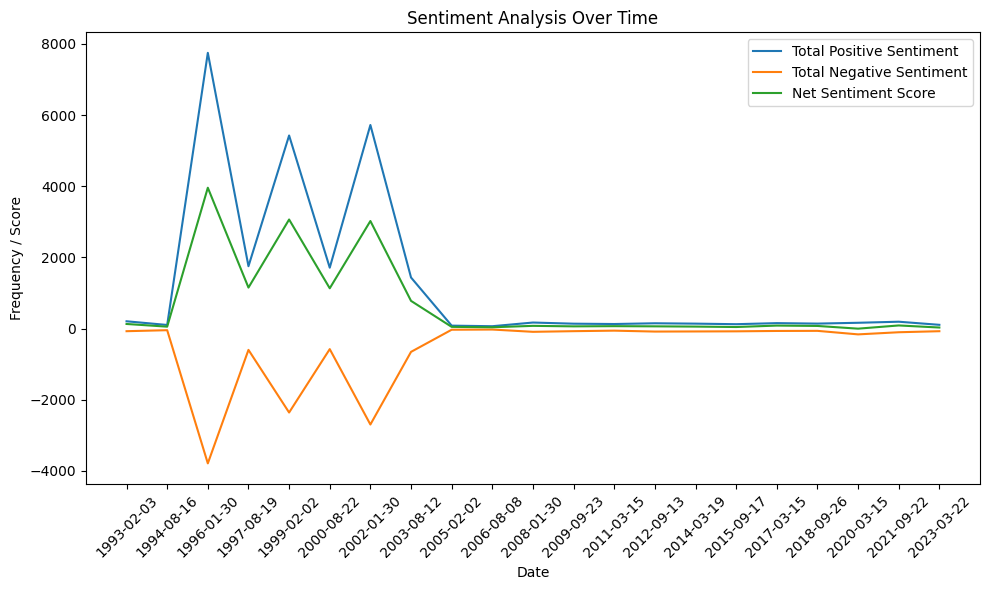

In [14]:
# Filter dataset to include every 12th date
filtered_dataset = dataset[::12]

# Extract the required data
dates = filtered_dataset['Date']
positive_frequency = filtered_dataset['Total Positive Sentiment']
negative_frequency = filtered_dataset['Total Negative Sentiment']
net_sentiment_score = filtered_dataset['Net Sentiment Score']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(dates, positive_frequency, label='Total Positive Sentiment')
plt.plot(dates, negative_frequency, label='Total Negative Sentiment')
plt.plot(dates, net_sentiment_score, label='Net Sentiment Score')

plt.xlabel('Date')
plt.ylabel('Frequency / Score')
plt.title('Sentiment Analysis Over Time')
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()

In [16]:
last_20_positive = dataset['Total Positive Sentiment'][-20:]
last_20_negative= dataset['Total Negative Sentiment'][-20:]
last_20_net = dataset['Net Sentiment Score'][-20:]

combined_df = pd.concat([last_20_positive, last_20_negative, last_20_net], axis=1)
combined_df

,Total Positive Sentiment,Total Negative Sentiment,Net Sentiment Score
221,190.525,-120.625,69.900
222,181.575,-101.175,80.400
223,275.250,-127.050,148.200
224,192.550,-90.200,102.350
225,190.650,-106.050,84.600
226,200.250,-94.000,106.250
227,227.850,-112.850,115.000
228,190.800,-105.125,85.675
229,174.375,-97.475,76.900
230,186.550,-98.900,87.650


In [22]:
# Create dictionaries to store positive and negative word frequencies per row
positive_word_frequencies = {}
negative_word_frequencies = {}

# Iterate over each row in the preprocessed text
for index, datapoint in dataset['Preprocessed Text'].iteritems():
    words = datapoint.lower().split()  # Tokenize the text into words

    # Iterate over each word and check its sentiment
    for word in words:
        if word in sentiment_word_list:
            sentiment = sentiment_word_list[word]
            if sentiment > 0:
                positive_word_frequencies[word] = positive_word_frequencies.get(word, 0) + 1
            elif sentiment < 0:
                negative_word_frequencies[word] = negative_word_frequencies.get(word, 0) + 1

# Get the 10 most frequent positive words
top_positive_words = sorted(positive_word_frequencies, key=positive_word_frequencies.get, reverse=True)[:10]

# Get the 10 most frequent negative words
top_negative_words = sorted(negative_word_frequencies, key=negative_word_frequencies.get, reverse=True)[:10]

print("Top 10 Positive Words:")
for word in top_positive_words:
    print(f"{word}: {positive_word_frequencies[word]}")

print("\nTop 10 Negative Words:")
for word in top_negative_words:
    print(f"{word}: {negative_word_frequencies[word]}")


C:\Users\abact\AppData\Local\Temp\ipykernel_7008\4267154987.py:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, datapoint in dataset['Preprocessed Text'].iteritems():


Top 10 Positive Words:
expansion: 19094
directive: 10511
consistent: 10502
information: 10230
good: 9887
gain: 9566
strong: 8211
prospect: 6876
strength: 6654
resource: 6405

Top 10 Negative Words:
risk: 19105
pressure: 14734
decline: 13082
uncertainty: 8002
weakness: 6715
concern: 6491
lower: 6239
unemployment: 5671
anecdotal: 5459
despite: 4858


In [18]:
# Create an empty list to store the word counts
word_count = []

# Iterate over each row in the preprocessed text
for datapoint in dataset['Preprocessed Text']:
    words = datapoint.lower().split()  # Tokenize the text into words
    num_words = len(words)  # Calculate the number of words in the row
    word_count.append(num_words)  # Add the word count to the list

# Print the word counts
print("Word Count:")
for count in word_count:
    print(count)

Word Count:
6085
3520
3059
4268
2859
3045
3582
3502
6108
3871
3871
4022
2971
3108
3368
3443
4827
3060
4603
2692
4141
2950
3022
2988
231389
15282
16975
19898
20140
19661
20171
19941
56266
51364
52203
71523
49348
42634
55571
25738
246599
48807
62890
78222
57291
65547
91559
55537
165012
49878
49643
80204
86735
46981
49838
57214
171965
55666
43131
49729
44929
38460
59217
46098
198938
56315
56315
61389
56000
42043
50672
48214
151380
51826
40666
85917
94274
65178
108403
63792
138617
35232
3987
60789
42013
43637
48106
40006
15463
34611
3135
2967
35614
2628
2330
2536
2732
4384
2614
2727
2141
2299
2371
4102
2320
2848
35983
3014
2399
2794
2399
2703
4649
2616
2842
2624
2829
3543
7057
48062
6996
3793
8166
3252
2869
4968
4736
4015
18119
3906
5095
4318
4457
8600
4879
4025
6507
4247
4849
4034
3627
4338
4042
6191
4080
4664
4240
4010
4979
4576
6732
4619
3998
4539
4914
4421
4821
4181
4641
6671
4633
4439
5180
4624
4835
4459
5414
7247
5145
3746
4871
5107
5140
5335
7768
4183
5288
4918
5201
5447
4993
4806
5

In [20]:
# Calculate the proportions of positive words per minute for each row
positive_words_per_minute = dataset['Total Positive Sentiment'] / word_count

# Calculate the proportions of negative words per minute for each row
negative_words_per_minute = dataset['Total Negative Sentiment'] / word_count

# Add the calculated columns to the dataset
dataset['Proportion Positive Words'] = positive_words_per_minute
dataset['Proportion Negative Words'] = negative_words_per_minute
dataset['Word Count'] = word_count

# Print the updated dataset
print(dataset)


                                  Federal_Reserve_Mins  \
0    A meeting of the Federal Open Market Committee...   
1    A meeting of the Federal Open Market Committee...   
2    A meeting of the Federal Open Market Committee...   
3    A meeting of the Federal Open Market Committee...   
4    A meeting of the Federal Open Market Committee...   
..                                                 ...   
236  The Federal Reserve, the central bank of the U...   
237  The Federal Reserve, the central bank of the U...   
238  The Federal Reserve, the central bank of the U...   
239  The Federal Reserve, the central bank of the U...   
240  The Federal Reserve, the central bank of the U...   

                                     Preprocessed Text        Date  \
0    meeting federal open market committee held off...  1993-02-03   
1    meeting federal open market committee held off...  1993-03-23   
2    meeting federal open market committee held off...  1993-05-18   
3    meeting federal op

In [21]:
# Calculate summary statistics
summary = dataset.describe()

summary

,Difference,Increase,Decrease,Level,CPI,Unemployment Rate,Consumer Sentiment,Retail Sales,Durable Goods Orders,Short-Term Treasury Bond Rate,Long-Term Treasury Bond Rate,Housing Sales,Wage,Level_diff,Total Positive Sentiment,Total Negative Sentiment,Net Sentiment Score,Proportion Positive Words,Proportion Negative Words,Word Count
count,241.00000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,240.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,0.01971,0.066390,0.046680,2.510373,208.510365,5.703734,86.708714,328983.058091,201234.738589,2.270124,3.889129,714.672199,337.896266,0.005208,757.313693,-360.243776,397.069917,0.030457,-0.016113,21659.730290
std,0.22448,0.152244,0.144876,2.151646,40.584948,1.746695,13.348263,108840.128443,35495.538761,2.070810,1.738902,257.430631,16.121467,0.275810,1328.250450,599.685397,761.202096,0.005246,0.003588,36682.444249
min,-1.00000,0.000000,0.000000,0.250000,143.100000,3.400000,50.000000,156266.000000,127233.000000,0.010000,0.650000,270.000000,312.000000,-1.500000,53.800000,-3791.000000,-70.850000,0.021311,-0.033786,2141.000000
25%,0.00000,0.000000,0.000000,0.250000,173.600000,4.400000,77.500000,249845.000000,173849.000000,0.150000,2.360000,532.000000,331.000000,0.000000,118.425000,-355.950000,45.350000,0.026286,-0.018246,4247.000000
50%,0.00000,0.000000,0.000000,1.750000,211.445000,5.400000,89.300000,321794.000000,200956.000000,1.710000,3.890000,696.000000,336.000000,0.000000,146.900000,-86.950000,70.100000,0.029625,-0.015832,5419.000000
75%,0.00000,0.000000,0.000000,4.750000,237.761000,6.200000,95.900000,396630.000000,226400.000000,4.530000,5.180000,880.000000,345.000000,0.000000,670.550000,-63.725000,365.250000,0.033696,-0.013617,20171.000000
max,0.75000,0.750000,1.000000,6.500000,302.918000,13.200000,112.000000,601983.000000,297311.000000,6.190000,7.960000,1389.000000,393.000000,0.750000,8791.075000,-23.650000,5918.725000,0.047709,-0.008585,246599.000000


While Net Sentiment Score will suffice for model building, it is hard to interpret. As such, we will standardize the Net Sentiment Score around 0 and evaluate the magnitude of positivity and negativity around a 0 mean with standard deviations used to calculate magnitude above or below mean

In [23]:
# Create an instance of the MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# Reshape the Net Sentiment Score column
net_sentiment_scores = dataset["Net Sentiment Score"].values.reshape(-1, 1)

# Scale the scores to the range of -1 to 1
scaled_scores = scaler.fit_transform(net_sentiment_scores)

# Add a new column for the scaled scores
dataset["Standardized Sentiment Score"] = scaled_scores

In [24]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(dataset["Standardized Sentiment Score"])

0     -0.933827
1     -0.955940
2     -0.963161
3     -0.952025
4     -0.964413
5     -0.963361
6     -0.954304
7     -0.954847
8     -0.926890
9     -0.961199
10    -0.961199
11    -0.959171
12    -0.959004
13    -0.958453
14    -0.950113
15    -0.951282
16    -0.945322
17    -0.962301
18    -0.946399
19    -0.958545
20    -0.950848
21    -0.958102
22    -0.954604
23    -0.954830
24     0.344954
25    -0.910077
26    -0.869198
27    -0.876586
28    -0.897873
29    -0.848938
30    -0.855532
31    -0.854380
32    -0.529316
33    -0.599905
34    -0.502302
35    -0.434726
36    -0.592258
37    -0.585830
38    -0.556947
39    -0.770426
40     1.000000
41    -0.634131
42    -0.671696
43    -0.555920
44    -0.722401
45    -0.758238
46    -0.481215
47    -0.651227
48     0.046744
49    -0.594220
50    -0.634248
51    -0.516735
52    -0.411260
53    -0.617051
54    -0.668758
55    -0.603828
56     0.240773
57    -0.335646
58    -0.597818
59    -0.711582
60    -0.598953
61    -0.740900
62    -0

In [25]:
# Calculate summary statistics
summary = dataset.describe()

summary

# Calculate the number of missing values
missing_values = dataset.isnull().sum()

# Display summary statistics and number of missing values
summary_with_missing = summary.append(missing_values.rename("missing_values"))
print(summary_with_missing)

                Difference    Increase    Decrease       Level         CPI  \
count            241.00000  241.000000  241.000000  241.000000  241.000000   
mean               0.01971    0.066390    0.046680    2.510373  208.510365   
std                0.22448    0.152244    0.144876    2.151646   40.584948   
min               -1.00000    0.000000    0.000000    0.250000  143.100000   
25%                0.00000    0.000000    0.000000    0.250000  173.600000   
50%                0.00000    0.000000    0.000000    1.750000  211.445000   
75%                0.00000    0.000000    0.000000    4.750000  237.761000   
max                0.75000    0.750000    1.000000    6.500000  302.918000   
missing_values     0.00000    0.000000    0.000000    0.000000    0.000000   

                Unemployment Rate  Consumer Sentiment   Retail Sales  \
count                  241.000000          241.000000     241.000000   
mean                     5.703734           86.708714  328983.058091   
std

C:\Users\abact\AppData\Local\Temp\ipykernel_7008\184997363.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_with_missing = summary.append(missing_values.rename("missing_values"))


In [26]:
# Create a copy of the dataset
clean_data_numeric = dataset.copy()

# Remove 'Federal_Reserve_Mins' and 'Preprocessed Text' columns
clean_data_numeric = clean_data_numeric.drop(['Federal_Reserve_Mins', 'Preprocessed Text'], axis=1)

# Display the resulting clean_data_numeric subset
clean_data_numeric.head()

,Date,Difference,Increase,Decrease,Level,CPI,Unemployment Rate,Consumer Sentiment,Retail Sales,Durable Goods Orders,Short-Term Treasury Bond Rate,Long-Term Treasury Bond Rate,Housing Sales,Wage,Level_diff,Total Positive Sentiment,Total Negative Sentiment,Net Sentiment Score,Proportion Positive Words,Proportion Negative Words,Word Count,Standardized Sentiment Score
0,1993-02-03,0.0,0.0,0.0,3.75,143.1,7.1,86.6,156266.0,128854.0,2.93,6.26,604.0,315.0,NaN,202.925,-75.600,127.325,0.033348,-0.012424,6085,-0.933827
1,1993-03-23,0.0,0.0,0.0,3.75,143.8,7.1,85.6,158979.0,127395.0,2.92,5.97,701.0,315.0,0.0,125.325,-64.225,61.100,0.035604,-0.018246,3520,-0.955940
2,1993-05-18,0.0,0.0,0.0,3.75,144.3,7.0,81.5,160127.0,130212.0,3.01,5.96,653.0,317.0,0.0,94.950,-55.475,39.475,0.031040,-0.018135,3059,-0.963161
3,1993-07-07,-0.5,0.0,0.5,3.25,144.5,6.9,77.0,162816.0,128111.0,3.04,5.81,655.0,317.0,-0.5,129.325,-56.500,72.825,0.030301,-0.013238,4268,-0.952025
4,1993-08-17,0.0,0.0,0.0,3.25,145.0,6.7,77.9,163258.0,127233.0,3.01,5.36,726.0,319.0,0.0,79.850,-44.125,35.725,0.027929,-0.015434,2859,-0.964413


Here, we move to further Exploratory Data Analysis. We begin with a correlation matrix to see if there are any endogenous correlations to a degree that one does not need to be included

              Date  Difference    Increase    Decrease       Level  \
count          241   241.00000  241.000000  241.000000  241.000000   
unique         241         NaN         NaN         NaN         NaN   
top     1993-02-03         NaN         NaN         NaN         NaN   
freq             1         NaN         NaN         NaN         NaN   
mean           NaN     0.01971    0.066390    0.046680    2.510373   
std            NaN     0.22448    0.152244    0.144876    2.151646   
min            NaN    -1.00000    0.000000    0.000000    0.250000   
25%            NaN     0.00000    0.000000    0.000000    0.250000   
50%            NaN     0.00000    0.000000    0.000000    1.750000   
75%            NaN     0.00000    0.000000    0.000000    4.750000   
max            NaN     0.75000    0.750000    1.000000    6.500000   

               CPI  Unemployment Rate  Consumer Sentiment   Retail Sales  \
count   241.000000         241.000000          241.000000     241.000000   
unique 

C:\Users\abact\AppData\Local\Temp\ipykernel_7008\4240336553.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = clean_data_numeric.corr()


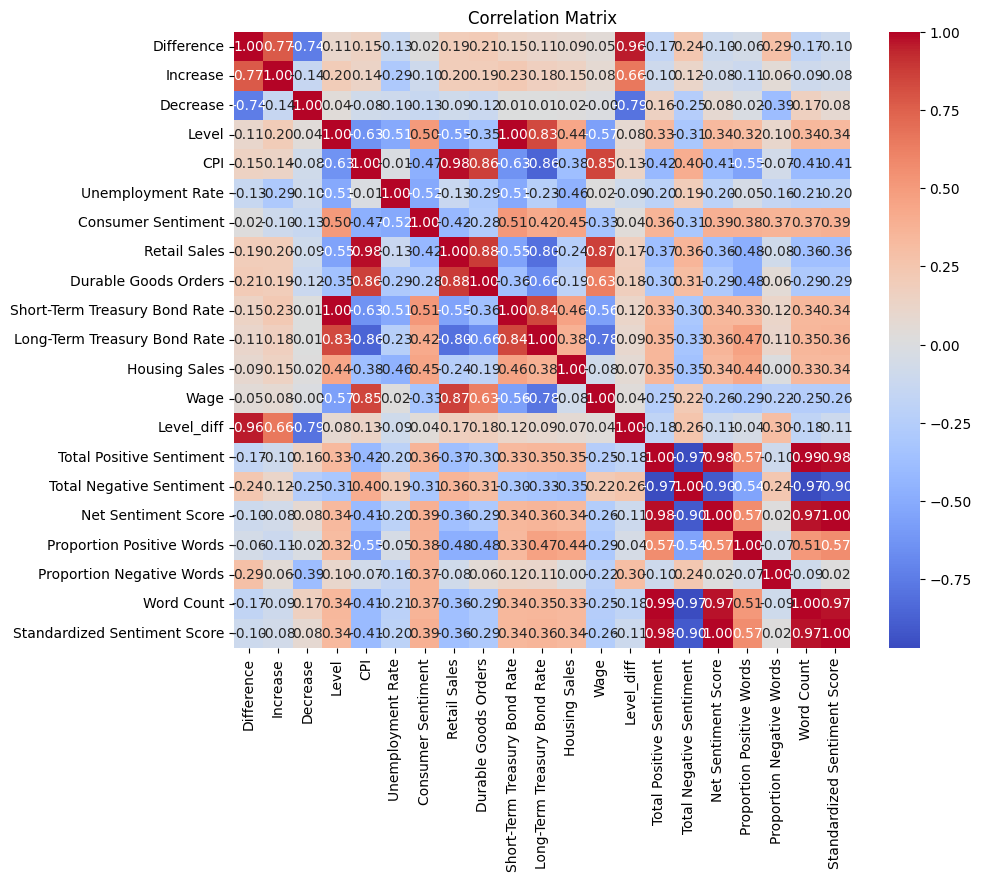

In [27]:
summary_stats = clean_data_numeric.describe(include='all')
print(summary_stats)

correlation_matrix = clean_data_numeric.corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

In [36]:
# Calculate the correlation matrix
correlation_matrix = dataset.corr()

# Get the absolute correlation values and sort them in descending order
correlation_values = correlation_matrix.abs().unstack().sort_values(ascending=False)

# Filter out the diagonal elements (self-correlations) and duplicate pairs
correlation_values = correlation_values[correlation_values.index.get_level_values(0) < correlation_values.index.get_level_values(1)]

# Get the top 10 highest correlation coefficients
top_20_correlations = correlation_values.head(20)

# Display the top 10 correlations
print(top_20_correlations)

Net Sentiment Score           Standardized Sentiment Score     1.000000
Level                         Short-Term Treasury Bond Rate    0.995643
Total Positive Sentiment      Word Count                       0.993307
CPI                           Retail Sales                     0.982122
Net Sentiment Score           Total Positive Sentiment         0.981169
Standardized Sentiment Score  Total Positive Sentiment         0.981169
Net Sentiment Score           Word Count                       0.970764
Standardized Sentiment Score  Word Count                       0.970764
Total Negative Sentiment      Total Positive Sentiment         0.969479
                              Word Count                       0.967863
Difference                    Level_diff                       0.955132
Standardized Sentiment Score  Total Negative Sentiment         0.903867
Net Sentiment Score           Total Negative Sentiment         0.903867
Durable Goods Orders          Retail Sales                     0

C:\Users\abact\AppData\Local\Temp\ipykernel_7008\4168789597.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


In [32]:
# Calculate the correlation matrix
correlation_matrix = dataset.corr()

# Get the absolute correlation values and sort them in ascending order
correlation_values = correlation_matrix.abs().unstack().sort_values(ascending=True)

# Filter out the diagonal elements (self-correlations) and duplicate pairs
correlation_values = correlation_values[correlation_values.index.get_level_values(0) < correlation_values.index.get_level_values(1)]

# Get the top 10 lowest correlation coefficients
top_20_correlations = correlation_values.head(20)

# Display the top 10 correlations
print(top_20_correlations)

Decrease                   Wage                             0.001486
Housing Sales              Proportion Negative Words        0.002752
Decrease                   Long-Term Treasury Bond Rate     0.012525
CPI                        Unemployment Rate                0.014930
Decrease                   Short-Term Treasury Bond Rate    0.014945
Proportion Negative Words  Standardized Sentiment Score     0.018412
Net Sentiment Score        Proportion Negative Words        0.018412
Unemployment Rate          Wage                             0.019634
Consumer Sentiment         Difference                       0.020557
Decrease                   Proportion Positive Words        0.021033
                           Housing Sales                    0.021779
Level_diff                 Wage                             0.035845
Consumer Sentiment         Level_diff                       0.039341
Level_diff                 Proportion Positive Words        0.042654
Decrease                   Level  

C:\Users\abact\AppData\Local\Temp\ipykernel_7008\3075411401.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


Z-scores are an important metric when calculating skewness. Any data that has an inherent trend will need to have that trend considered before being used for causal inference, as that skewness may have an endogenous explanation of its own.

In [ ]:
# Select only numeric columns
numeric_columns = clean_data_numeric.select_dtypes(include=np.number).columns

# Calculate z-scores for each numeric column in the dataset
z_scores = stats.zscore(clean_data_numeric[numeric_columns])

# Create a new DataFrame with z-scores
z_scores_df = pd.DataFrame(z_scores, columns=numeric_columns)

z_scores

z_scores_df


In [ ]:
def calculate_z_scores(data):
    n = len(data)
    if data.dtype.kind in ['i', 'f']:  # Check if data is numeric
        observed_skewness = skew(data)
        observed_kurtosis = kurtosis(data)

        expected_skewness = 0
        expected_kurtosis = 0

        standard_error_skewness = np.sqrt(6 / n)
        standard_error_kurtosis = np.sqrt(24 / n)

        z_score_skewness = (observed_skewness - expected_skewness) / standard_error_skewness
        z_score_kurtosis = (observed_kurtosis - expected_kurtosis) / standard_error_kurtosis

        return z_score_skewness, z_score_kurtosis
    else:
        return None, None


# Calculate z-scores for skewness and kurtosis for each column in the dataset
z_scores = {}
for column in dataset.columns:
    z_score_skewness, z_score_kurtosis = calculate_z_scores(dataset[column])
    if z_score_skewness is not None and z_score_kurtosis is not None:
        z_scores[column] = (z_score_skewness, z_score_kurtosis)

# Print the z-scores for each column
for column, (z_score_skewness, z_score_kurtosis) in z_scores.items():
    print("Column:", column)
    print("Z-score for skewness:", z_score_skewness)
    print("Z-score for kurtosis:", z_score_kurtosis)
    print()

In [ ]:
clean_data_numeric

Time plots are a good way to view trends and skewness, as well as eyeballing which variables seem to have relevance to the outcome variable and which need cleaning.

In [ ]:
for column in clean_data_numeric.columns:
    plt.figure(figsize=(10, 4))
    plt.plot(clean_data_numeric['Date'], clean_data_numeric[column])
    plt.title(column)
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.xticks(clean_data_numeric['Date'][::12], rotation=45)

    # Convert column values to numeric
    y = pd.to_numeric(clean_data_numeric[column], errors='coerce')
    
    # Calculate the line of best fit
    x = np.arange(len(clean_data_numeric['Date']))
    slope, intercept, _, _, _ = linregress(x, y)
    line = slope * x + intercept

    plt.plot(x, line, color='red')
    plt.show()

Analyzing autocorrelations is a natural next step, as they tell us if there are any lagged or seasonal effects at work for each of our variables. If there are, then we can account for these lagged effects in predicting the outcome variable.

In [ ]:
# Iterate over each column (excluding 'Date' and 'Sentiment Label')
for column in clean_data_numeric.columns:
    if column not in ['Date', 'Sentiment Label']:
        # Compute the autocorrelation
        acf = sm.tsa.acf(clean_data_numeric[column], nlags=10)
        
        # Plot the autocorrelation
        plt.stem(range(len(acf)), acf)
        plt.xlabel('Lag')
        plt.ylabel('Autocorrelation')
        plt.title(f'Autocorrelation Plot of {column}')
        plt.show()

In [ ]:
# Split into training, validation, and test sets
train_data, temp_data = train_test_split(dataset, test_size=0.2, shuffle=False)
val_data, test_data = train_test_split(temp_data, test_size=0.5, shuffle=False)

# Verify the sizes of each set
print("Training set size:", len(train_data))
print("Validation set size:", len(val_data))
print("Test set size:", len(test_data))

train_data.to_csv(r'C:\Users\abact\BC-Project\data\train_data.csv', index=False)
temp_data.to_csv(r'C:\Users\abact\BC-Project\data\temp_data.csv', index=False)
val_data.to_csv(r'C:\Users\abact\BC-Project\data\val_data.csv', index=False)